In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=22)  # fontsize of the figure title
plt.rc('axes', titlesize=20)  # fontsize of the figure title

In [14]:
re_case_dir = Path.cwd()
results = pd.read_csv(re_case_dir / "surrogate_results.csv")
results = results.drop(columns=["Unnamed: 0", 'wind_mw'])
results['pem_bid_round'] = results['pem_bid'].astype('int')
results['pem_mw_round'] = results['pem_mw'].astype('int')
results['e_revenue_mil'] = (results['e_revenue'] * 1e-6)
results['h_revenue_mil'] = (results['h_revenue'] * 1e-6)
results['NPV_bil'] = (results['NPV'] * 1e-9)
results

,pem_mw,pem_bid,e_revenue,h_revenue,NPV,freq_day_0,freq_day_1,freq_day_2,freq_day_3,freq_day_4,...,freq_day_15,freq_day_16,freq_day_17,freq_day_18,freq_day_19,pem_bid_round,pem_mw_round,e_revenue_mil,h_revenue_mil,NPV_bil
0,127.05,15.0,-9.055358e+06,3.609697e+07,-1.341216e+09,0.046354,0.298158,0.009904,0.025503,0.061121,...,0.113959,0.038549,0.020936,0.012776,0.037204,15,127,-9.055358,36.096968,-1.341216
1,169.40,15.0,-6.912576e+06,4.316548e+07,-1.302418e+09,0.046492,0.299377,0.010101,0.025400,0.061031,...,0.113618,0.038397,0.020682,0.012779,0.037624,15,169,-6.912576,43.165482,-1.302418
2,211.75,15.0,-4.805190e+06,4.926947e+07,-1.278638e+09,0.046525,0.299594,0.010257,0.025141,0.061349,...,0.113547,0.038524,0.020288,0.012755,0.037802,15,211,-4.805190,49.269468,-1.278638
3,254.10,15.0,-2.758052e+06,5.411040e+07,-1.274738e+09,0.046564,0.299389,0.010445,0.024650,0.061826,...,0.113498,0.038560,0.019808,0.012768,0.037816,15,254,-2.758052,54.110399,-1.274738
4,296.45,15.0,-7.958967e+05,5.795131e+07,-1.287151e+09,0.046739,0.299349,0.010735,0.023748,0.062277,...,0.113462,0.038053,0.019332,0.012879,0.037873,15,296,-0.795897,57.951308,-1.287151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,254.10,45.0,-2.183845e+05,5.257383e+07,-1.258756e+09,0.047248,0.356149,0.013408,0.027477,0.059031,...,0.070820,0.025340,0.018646,0.013680,0.048561,45,254,-0.218384,52.573828,-1.258756
60,296.45,45.0,1.737540e+06,5.622579e+07,-1.274100e+09,0.046144,0.358988,0.012856,0.025628,0.056971,...,0.071225,0.023428,0.020602,0.013649,0.054214,45,296,1.737540,56.225791,-1.274100
61,338.80,45.0,3.589080e+06,5.872526e+07,-1.308344e+09,0.044701,0.360220,0.012222,0.023750,0.054394,...,0.071851,0.022336,0.022823,0.013639,0.060307,45,338,3.589080,58.725258,-1.308344
62,381.15,45.0,5.310035e+06,6.011697e+07,-1.361219e+09,0.043330,0.360551,0.011760,0.022087,0.051706,...,0.072219,0.021813,0.024799,0.013642,0.065556,45,381,5.310035,60.116974,-1.361219


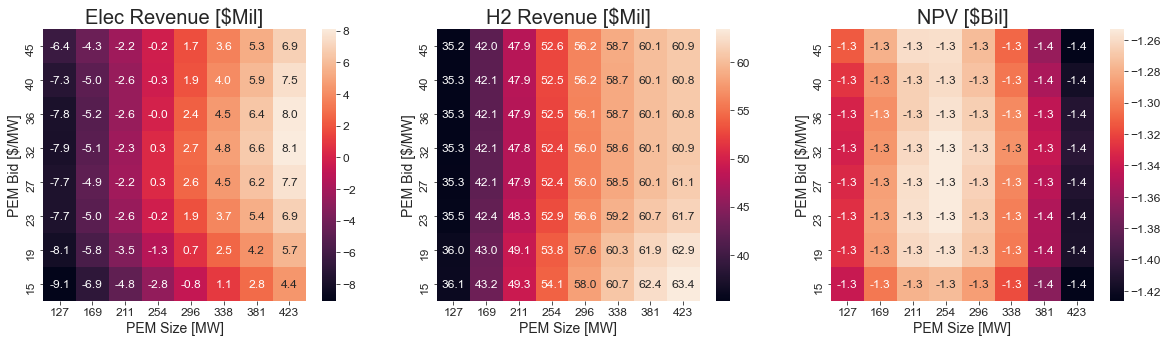

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values='e_revenue_mil',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs[0])
axs[0].set_title("Elec Revenue [$Mil]")
axs[0].set_xlabel("PEM Size [MW]")
axs[0].set_ylabel("PEM Bid [$/MW]")

sns.heatmap(results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values='h_revenue_mil',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs[1])
axs[1].set_title("H2 Revenue [$Mil]")
axs[1].set_xlabel("PEM Size [MW]")
axs[1].set_ylabel("PEM Bid [$/MW]")

sns.heatmap(results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values='NPV_bil',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs[2])
axs[2].set_title("NPV [$Bil]")
axs[2].set_xlabel("PEM Size [MW]")
axs[2].set_ylabel("PEM Bid [$/MW]")

for ax in axs:
    ax.invert_yaxis()

# Compare with Input Dataset from Prescient Sweep

In [27]:
import glob
from dispatches.case_studies.renewables_case.double_loop_utils import read_rts_gmlc_wind_inputs
from dispatches_sample_data import rts_gmlc
from dispatches.case_studies.renewables_case.load_parameters import wind_cap_cost, wind_op_cost, pem_cap_cost, pem_op_cost, PA

sweep_dir = Path("/Users/dguittet/Projects/Dispatches/NN_models/results_renewable_sweep_Wind_H2/results_parameter_sweep_15_1000")
wind_cf = read_rts_gmlc_wind_inputs(rts_gmlc.source_data_path, gen_name="303_WIND_1", agg_func="first")['303_WIND_1-RTCF']
params = pd.read_csv(sweep_dir / "sweep_parameters.csv")

records = []
for filename in glob.glob(str(sweep_dir / "*results*.csv")):
    res = pd.read_csv(filename)
    ind = int(Path(filename).stem.split('_')[-1])
    pem_bid = params['PEM_bid'][ind]
    pem_size = params['PEM_power_capacity'][ind]
    e_revenue = (res["Dispatch DA"] * res["LMP DA"] + (res["Dispatch"] - res["Dispatch DA"]) * res["LMP"]).sum()
    h_revenue = (wind_cf.values * 847 - res['Dispatch']).sum() / 54.953 * 3 * 1e3
    cap_cost = (847 * wind_cap_cost + pem_size * pem_cap_cost) * 1e3 
    fixed_op_cost = (847 * wind_op_cost + pem_size * pem_op_cost) * 1e3
    npv = -cap_cost + PA * (e_revenue + h_revenue - fixed_op_cost)
    records.append({
        "e_revenue": e_revenue,
        "h_revenue": h_revenue,
        "pem_bid": pem_bid,
        "pem_mw": pem_size,
        'NPV': npv})
sweep_results = pd.DataFrame(records)
sweep_results['pem_bid_round'] = sweep_results['pem_bid'].astype('int')
sweep_results['pem_mw_round'] = sweep_results['pem_mw'].astype('int')
sweep_results['e_revenue_mil'] = (sweep_results['e_revenue'] * 1e-6)
sweep_results['h_revenue_mil'] = (sweep_results['h_revenue'] * 1e-6)
sweep_results['NPV_bil'] = (sweep_results['NPV'] * 1e-9)


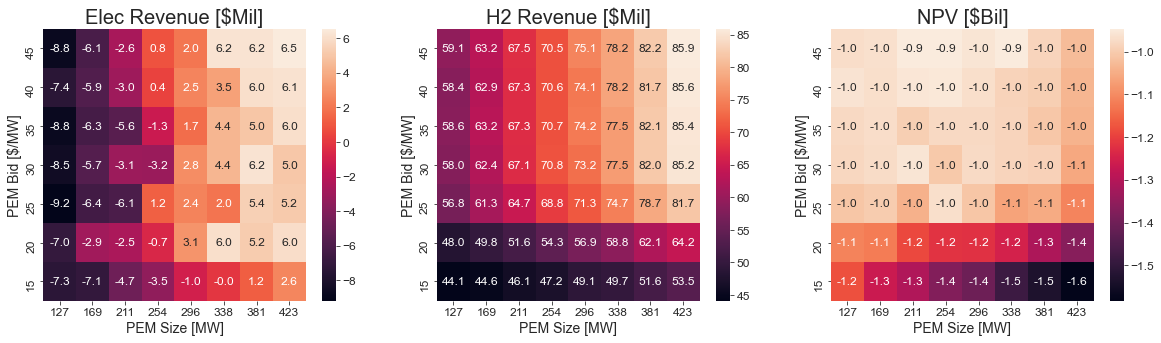

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(sweep_results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values='e_revenue_mil',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs[0])
axs[0].set_title("Elec Revenue [$Mil]")
axs[0].set_xlabel("PEM Size [MW]")
axs[0].set_ylabel("PEM Bid [$/MW]")

sns.heatmap(sweep_results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values='h_revenue_mil',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs[1])
axs[1].set_title("H2 Revenue [$Mil]")
axs[1].set_xlabel("PEM Size [MW]")
axs[1].set_ylabel("PEM Bid [$/MW]")

sns.heatmap(sweep_results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values='NPV_bil',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs[2])
axs[2].set_title("NPV [$Bil]")
axs[2].set_xlabel("PEM Size [MW]")
axs[2].set_ylabel("PEM Bid [$/MW]")

for ax in axs:
    ax.invert_yaxis()

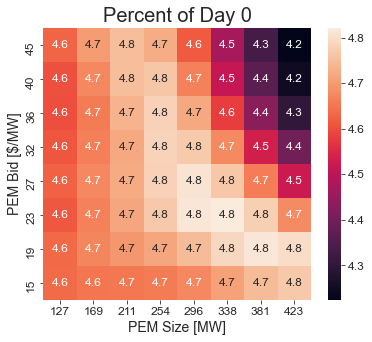

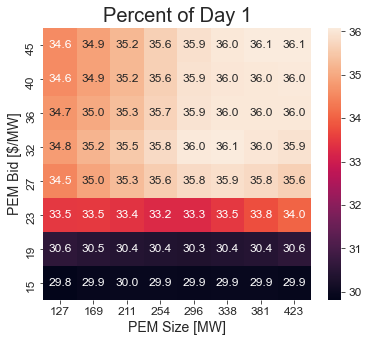

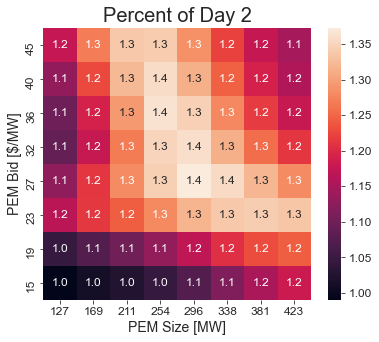

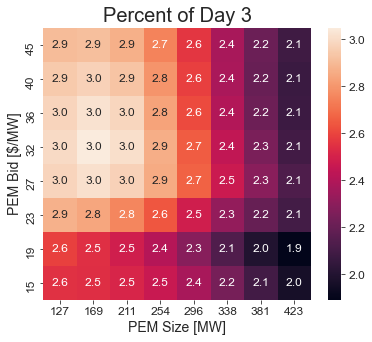

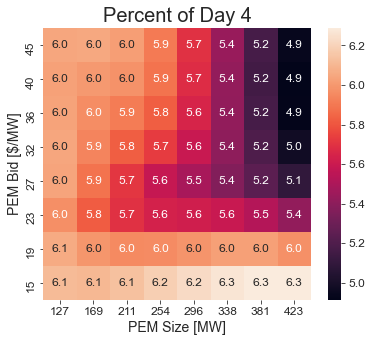

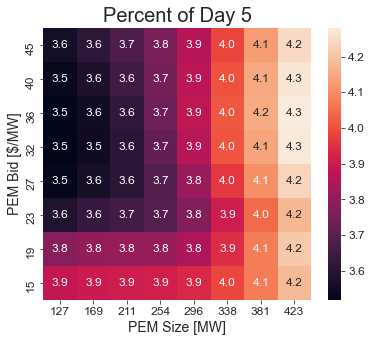

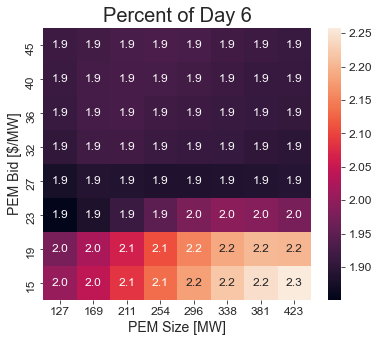

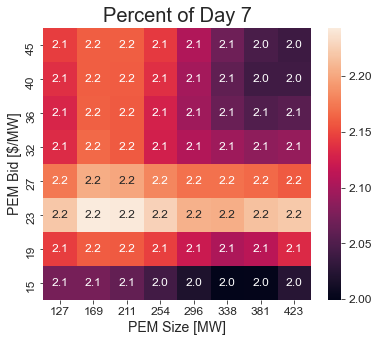

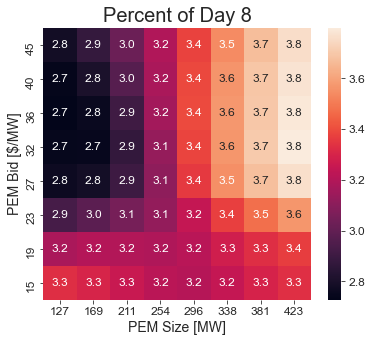

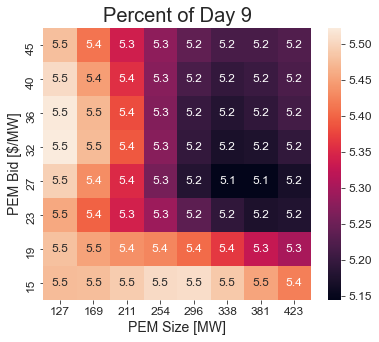

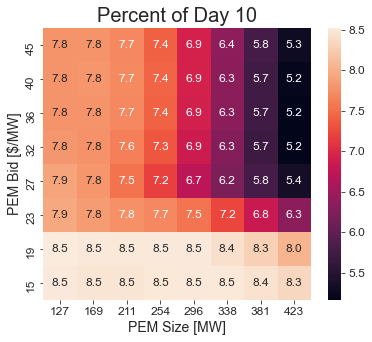

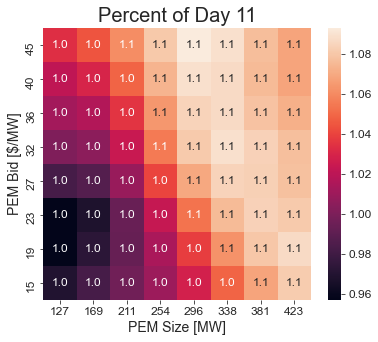

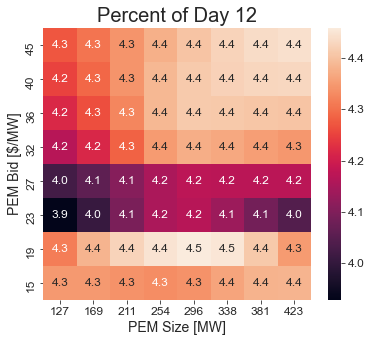

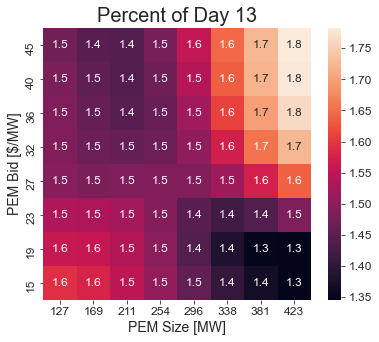

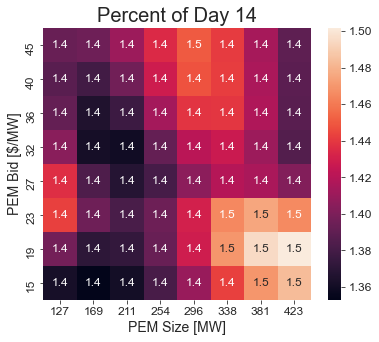

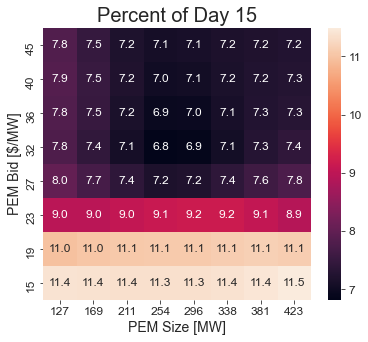

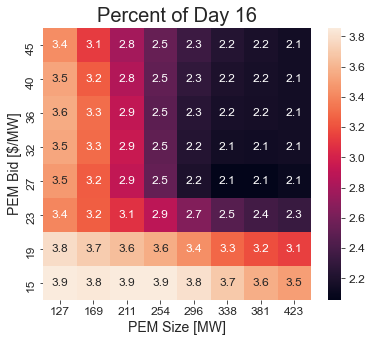

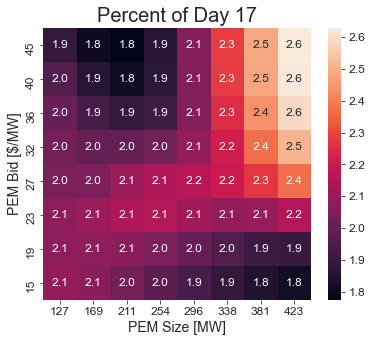

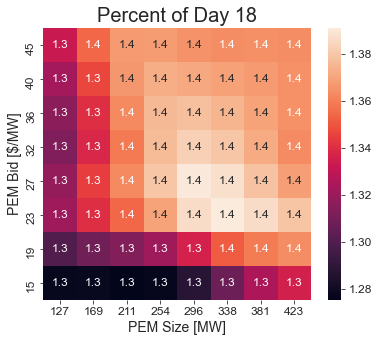

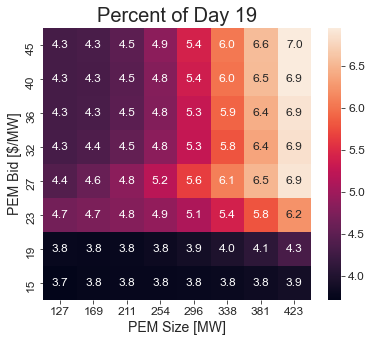

In [29]:
for day in range(20):
    results[f'percent_day_{day}'] = results[f'freq_day_{day}'] * 1e2
    fig, axs = plt.subplots(1, 1, figsize=(6, 5))
    sns.heatmap(results.pivot_table(index=f'pem_bid_round', 
                                columns=f"pem_mw_round", 
                                values=f'percent_day_{day}',
                                aggfunc='mean'), annot=True, fmt=".1f", ax=axs)
    axs.set_title(f"Percent of Day {day}")
    axs.set_xlabel("PEM Size [MW]")
    axs.set_ylabel("PEM Bid [$/MW]")
    axs.invert_yaxis()